# NS-VQA

In [ ]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install -U detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
!pip install pytorch_lightning
!pip install torchmetrics
!pip install pytorch-lightning-bolt
!pip install -U torchtext==0.10.0

In [1]:
import pytorch_lightning

In [2]:
import pycocotools.mask as mask_util
from tqdm import tqdm
import json
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/notebooks/clevr/ns-vqa/ns-vqa/scene_parse')

In [1]:
from scene_parse.object_detector.datasets import ClevrSingleClassDataset
from scene_parse.object_detector.models import get_pretrained_mask_rcnn
from scene_parse.object_detector.predictor import get_object_predictor
from functools import partial

In [2]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
import h5py
import os
from tqdm import tqdm
import pycocotools.mask as mask_util
import numpy as np
import json


In [3]:
dataset = ClevrSingleClassDataset()
categories = dataset.get_categories()

In [4]:
DatasetCatalog.register("clevr", dataset.dataset_loader('G:/My Drive/Research/data/Clevr_mini/images', 'G:/My Drive/Research/data/Clevr_mini\CLEVR_mini_coco_anns.json'))
MetadataCatalog.get("clevr").set(thing_classes=categories)

loading dataset: 100%|██████████| 4000/4000 [00:07<00:00, 556.22it/s]


namespace(name='clevr', thing_classes=['object'])

In [5]:
len(MetadataCatalog.get('clevr').get('thing_classes'))

1

In [6]:
from detectron2.engine import DefaultTrainer

cfg = get_pretrained_mask_rcnn('clevr', len(categories))

cfg.OUTPUT_DIR = './data/object_detector/'

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[11/08 23:25:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[11/08 23:25:00 d2.data.build]: Removed 0 images with no usable annotations. 4000 images left.
[11/08 23:25:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/08 23:25:01 d2.data.build]: Using training sampler TrainingSampler
[11/08 23:25:01 d2.data.common]: Serializing 4000 elements to byte tensors and concatenating them all ...
[11/08 23:25:01 d2.data.common]: Serialized dataset takes 6.50 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[11/08 23:25:01 d2.engine.train_loop]: Starting training from iteration 0
[11/08 23:25:11 d2.utils.events]:  eta: 0:22:17  iter: 19  total_loss: 2.218  loss_cls: 0.6006  loss_box_reg: 0.9055  loss_mask: 0.6873  loss_rpn_cls: 0.0167  loss_rpn_loc: 0.01342  time: 0.1747  data_time: 0.3215  lr: 1.9981e-05  max_mem: 2765M
[11/08 23:25:15 d2.utils.events]:  eta: 0:24:50  iter: 39  total_loss: 1.95  loss_cls: 0.4967  loss_box_reg: 0.8771  loss_mask: 0.5374  loss_rpn_cls: 0.01001  loss_rpn_loc: 0.009925  time: 0.1834  data_time: 0.0023  lr: 3.9961e-05  max_mem: 2766M
[11/08 23:25:19 d2.utils.events]:  eta: 0:25:06  iter: 59  total_loss: 1.652  loss_cls: 0.3899  loss_box_reg: 0.8572  loss_mask: 0.3578  loss_rpn_cls: 0.006119  loss_rpn_loc: 0.01026  time: 0.1842  data_time: 0.0022  lr: 5.9941e-05  max_mem: 2766M
[11/08 23:25:22 d2.utils.events]:  eta: 0:24:43  iter: 79  total_loss: 1.367  loss_cls: 0.3068  loss_box_reg: 0.7927  loss_mask: 0.2556  loss_rpn_cls: 0.001921  loss_rpn_loc: 0.009668  

In [85]:
predictor = get_object_predictor(cfg, os.path.join('ns-vqa/object-detector', "model_final.pth"), 0.5)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
# Remember to remove the clevr_coco_format.json file if the dataset has been changed. e.g. from 1 category to 48 categories

evaluator = COCOEvaluator("clevr", output_dir='.')
val_loader = build_detection_test_loader(cfg, "clevr")

print(inference_on_dataset(trainer.model, val_loader, evaluator))

In [92]:
h5_filename = '/notebooks/clevr/data/Original/images.h5'
images = h5py.File(h5_filename, 'r')['images']
# categories = [0]

In [93]:
def empty_results(num_classes, num_images):
    """Return empty results lists for boxes, masks, and keypoints.
    Box detections are collected into:
      all_boxes[cls][image] = N x 5 array with columns (x1, y1, x2, y2, score)
    Instance mask predictions are collected into:
      all_segms[cls][image] = [...] list of COCO RLE encoded masks that are in
      1:1 correspondence with the boxes in all_boxes[cls][image]
    Instance features are collected
    Keypoint predictions are collected into:
      all_keyps[cls][image] = [...] list of keypoints results, each encoded as
      a 3D array (#rois, 4, #keypoints) with the 4 rows corresponding to
      [x, y, logit, prob] (See: utils.keypoints.heatmaps_to_keypoints).
      Keypoints are recorded for person (cls = 1); they are in 1:1
      correspondence with the boxes in all_boxes[cls][image].
    """
    all_boxes = [[[] for _ in range(num_images)] for _ in range(num_classes)]
    all_segms = [[[] for _ in range(num_images)] for _ in range(num_classes)]
    all_feats = [[[] for _ in range(num_images)] for _ in range(num_classes)]
    all_keyps = [[[] for _ in range(num_images)] for _ in range(num_classes)]
    return all_boxes, all_segms, all_feats, all_keyps

def extend_results(index, all_res, im_res, classes):
    """Add results for an image to the set of all results at the specified
    index.
    """
    # Skip cls_idx 0 (__background__)
    for obj_idx in range(0, len(im_res)):
        all_res[classes[obj_idx]][index].append(im_res[obj_idx])

def get_segments(pred_masks):
    segs = []
    for mask in pred_masks:
        rle = mask_util.encode(np.asfortranarray(mask, dtype=np.uint8))

        # For dumping to json, need to decode the byte string.
        # https://github.com/cocodataset/cocoapi/issues/70
        rle['counts'] = rle['counts'].decode('ascii')
        segs.append(rle)
    return segs

def append_score_to_bboxes(bboxes, scores):
    # extend the dimension of scores
    scores = scores.unsqueeze(dim=1)
    return np.hstack([bboxes, scores])

all_boxes, all_segms, all_feats, all_keyps = empty_results(len(categories), len(images))

for i, im in enumerate(tqdm(images)):

    # convert the image color channel to the one wrt cv2
    predictions, features = predictor(im[:, :, ::-1])
    objects = predictions['instances'].to('cpu')
    classes = objects.pred_classes.numpy()
    segments = get_segments(objects.pred_masks.numpy())
    bboxes = append_score_to_bboxes(objects.pred_boxes.tensor, objects.scores)
    extend_results(i, all_boxes, bboxes, classes)
    extend_results(i, all_segms, segments, classes)
    extend_results(i, all_feats, features.to('cpu').numpy(), classes)

100%|██████████| 1000/1000 [01:23<00:00, 11.95it/s]


In [71]:
import random
import matplotlib.pyplot as plt

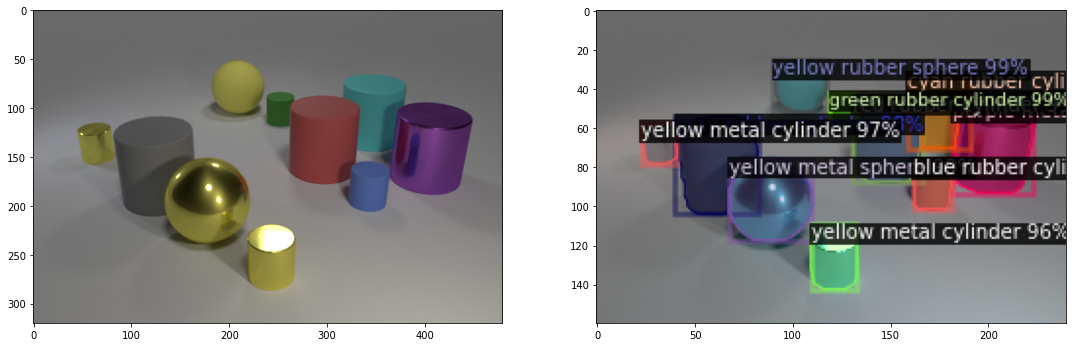

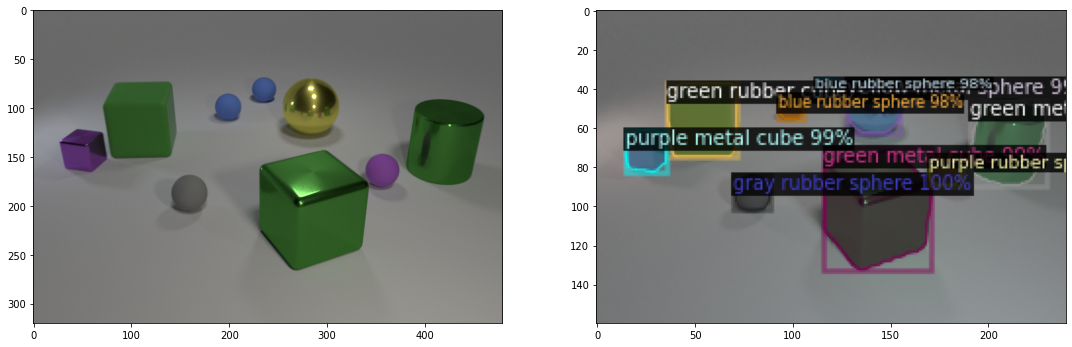

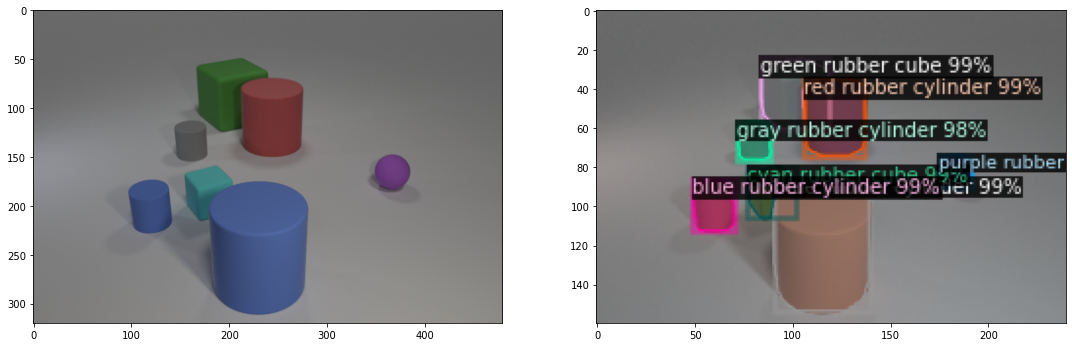

In [88]:
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
for im in images[:3]:    
    outputs = predictor(im[:, :, ::-1])  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im,
                   metadata=MetadataCatalog.get('clevr'), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(18.5, 10.5)
    ax[0].imshow(im)
    out = v.draw_instance_predictions(outputs[0]["instances"].to("cpu"))
    ax[1].imshow(out.get_image()[:, :, ::-1])

In [94]:
import pickle
result = dict(
    all_boxes=all_boxes,
    all_segms=all_segms,
    all_keyps=all_keyps,
    all_feats=all_feats,
    cfg='None'
)
file_name = 'detections_clevr_original_48.pkl'
with open(file_name, 'wb') as f:
    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)


In [ ]:
%cd /notebooks/clevr/ns-vqa/ns-vqa/scene_parse/attr_net_new

In [ ]:
!python tools/process_proposals.py \
    --dataset clevr \
    --proposal_path /notebooks/clevr/detections_small_1000.pkl \
    --score_thresh 0.5 \
    --output_path ../../data/attr_net/objects/clevr_val_small_1000.json \
    --suppression 1\
    --output_path_rel ../../data/attr_net/objects/clevr_val_original_48.json

In [ ]:
!python tools/run_train.py \
    --max_epochs 10 \
    --batch_size 64 \
    --run_dir ../../data/attr_net/outputs/trained_model \
    --clevr_mini_ann_path ../../data/attr_net/objects/clevr_val_objs_custom_detection.json \
    --clevr_mini_img_dir /notebooks/clevr/CLEVR_mini//images.h5 \
    --num_workers 8 \
    --concat_img 0

In [ ]:
!python tools/run_test.py     --output_path /notebooks/scenes.json     --model_path /notebooks/clevr/ns-vqa/ns-vqa/scene_parse/attr_net_new/pretrained/epoch=13-step=4983.ckpt     --clevr_ann_path ../../data/attr_net/objects/clevr_val_small_1000.json     --clevr_img_h5 /notebooks/clevr/data/Original/images.h5 --attr_map_path /notebooks/clevr/ns-vqa/ns-vqa/clevr_attr_map.json

In [ ]:
%cd /notebooks/clevr/ns-vqa/ns-vqa/scene_parse/rel_net

In [ ]:
!python tools/run_test.py \
    --scenes_path /notebooks/scenes_with_rels.json \
    --output_path /notebooks/scenes_with_rels.json \
    --model_path /notebooks/clevr/ns-vqa/ns-vqa/scene_parse/rel_net/pretrained_vertical/epoch=4-step=11224-v1.ckpt \
    --clevr_ann_path ../../data/attr_net/objects/clevr_val_small_1000_rel.json \
    --clevr_img_h5 /notebooks/clevr/data/Original/images.h5 \
    --attr_map_path /notebooks/clevr/ns-vqa/ns-vqa/clevr_attr_map.json \
    --label_name vertical_labels

In [ ]:
!python tools/run_test.py \
    --scenes_path /notebooks/scenes.json \
    --output_path /notebooks/scenes_with_rels.json \
    --model_path /notebooks/clevr/ns-vqa/ns-vqa/scene_parse/rel_net/pretrained_horizontal/epoch=4-step=11224.ckpt \
    --clevr_ann_path ../../data/attr_net/objects/clevr_val_small_1000_rel.json \
    --clevr_img_h5 /notebooks/clevr/data/Original/images.h5 \
    --attr_map_path /notebooks/clevr/ns-vqa/ns-vqa/clevr_attr_map.json \
    --label_name horizontal_labels

In [ ]:
!python tools/run_train.py \
    --max_epochs 5 \
    --batch_size 64 \
    --clevr_mini_ann_path ../../data/attr_net/objects/clevr_val_objs_custom_detection_relationshps.json \
    --clevr_mini_img_dir /notebooks/clevr/CLEVR_mini//images.h5 \
    --num_workers 8\
    --label_name vertical_labels

In [ ]:
!python tools/run_test.py \
    --run_dir ../../data/attr_net/results \
    --dataset clevr \
    --load_checkpoint_path ../../data/pretrained/attribute_net.pt \
    --clevr_val_ann_path ../../data/attr_net/objects/clevr_val_objs_custom_detection_old.json \
    --output_path ../../data/attr_net/results/clevr_val_scenes_parsed_custom_detection_old.json \
    --clevr_val_img_dir /notebooks/clevr/data/Original/images.h5 \
    --use_cat_label 0\
    --batch_size 64

In [ ]:
from rel_net.datasets.clevr_relation import ClevrRelationDataset
from attr_net_new.datasets.clevr_object import ClevrObjectDataset
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
dataset = ClevrRelationDataset('../../data/attr_net/objects/clevr_val_objs_relationshps.json', '/notebooks/clevr/CLEVR_mini//images.h5', 'mini', 'horizontal_labels')

In [ ]:
source, label = dataset[2]
print(torch.min(source))
f, axarr = plt.subplots(1,2)
f.set_size_inches(18.5, 10.5)
axarr[0].imshow(source.numpy().transpose((1, 2, 0)))


In [ ]:
dataset_object = ClevrObjectDataset('/notebooks/clevr/ns-vqa/ns-vqa/data/attr_net/objects/clevr_val_objs_custom_detection.json', '/notebooks/clevr/CLEVR_mini//images.h5', 'mini', concat_img=False)

In [ ]:
dataset_object.set_attr_name('color')

In [ ]:
image, label = dataset_object[0]
plt.imshow(image.numpy().transpose((1, 2, 0)))


In [ ]:
import h5py
images = h5py.File('/notebooks/clevr/data/Original/images.h5')['images']
plt.imshow(images[207])


In [ ]:
def find_nearest_obj(pos, positions):
    return ((positions - pos)**2).sum(axis=1).argmin()
color = 0
count = 0
for scene, gt_scene in zip(scenes['scenes'], gt_scenes):
    grand_positions = np.array([obj['position'][:2] for obj in gt_scene['objects']])
    for obj in scene['objects']:
        position = np.array([obj['position'][:2]])
        nearest_id = find_nearest_obj(position, grand_positions)
        gt_obj = gt_scene['objects'][nearest_id]
        count += 1
        color += int(obj['size'] == gt_obj['size'])
print(color / count)        

## Attempts to find and fix the inconsistent relationships

In [ ]:
import json
import networkx as nx
import numpy as np

In [ ]:
with open('/notebooks/scenes_with_rels_corrected.json') as f:
    scenes = json.load(f)['scenes']

with open('/notebooks/clevr/data/Original/scenes.json') as f:
    gt_scenes = json.load(f)['scenes']

In [ ]:
def find_ordering_direction(scene):
    relationships = scene['relationships']
    for dir in ['left', 'right', 'front', 'behind']:
        nums = [len(nodes) for nodes in relationships[dir]]
        if len(nums) == len(set(nums)):
            return dir
    return ''

def order_nodes(scene, direction):
    relationships = scene['relationships']
    nums = [len(nodes) for nodes in relationships[direction]]
    sorted_node_ids = np.argsort(nums)
    return [scene['objects'][i] for i in sorted_node_ids]

In [ ]:
count = 0
acc = 0
attr = 'material'
for scene, gt_scene in zip(scenes, gt_scenes):
    direction = find_ordering_direction(scene)
    nodes = order_nodes(scene, direction)
    gt_nodes = order_nodes(gt_scene, direction)
    for node, gt_node in zip(nodes, gt_nodes):
        count += 1
        if node[attr] == gt_node[attr]:
            acc += 1
        else:
            node[attr] = gt_node[attr]
    
print(acc / count)

In [ ]:
with open('/notebooks/scenes_with_rels_corrected_gt_attrs.json', 'w') as f:
    json.dump({'scenes': scenes}, f)

In [ ]:
def convert_to_nx(scene):
    graph = nx.MultiDiGraph()
    nodes = [(i, data) for i, data in enumerate(scene['objects'])]
    
    graph.add_nodes_from(nodes)
    for direction, data in scene['relationships'].items():
        for source, targets in enumerate(data):
            for target in targets:
                graph.add_edge(source, target, direction)
    return graph

In [ ]:
graphs = []

for scene in scenes:
    graphs.append(convert_to_nx(scene))
    
contradictory_map = {
    'left': 'right',
    'right': 'left',
    'behind': 'front',
    'front': 'behind'
}

In [ ]:
def toSimpleGraph(g, edge_type):
    new_g = nx.DiGraph()
    for edge in [edge for edge in g.edges if edge[2] == edge_type]:
        new_g.add_edge(edge[0], edge[1])
    return new_g

def transitivity_measure(g):
    all_paths = nx.all_pairs_shortest_path(g)
    actual = 0
    expected = 0
    for node, dests in all_paths:
        for dest, path in dests.items():
            # don't consider the node it self
            if node == dest:
                continue
            expected += 1
            if len(path) == 2:
                actual += 1
    return (expected - actual) / expected if expected != 0 else 0

In [ ]:
def contradiction_measure(g, contradictory_map):
    count = 0
    for edge in g.edges:
        if (edge[0], edge[1], contradictory_map[edge[2]]) in g.edges:
            count += 1
    return count

In [ ]:
def induction_measure(g, induction_map):
    count = 0
    for edge in g.edges:
        if (edge[1], edge[0], induction_map[edge[2]]) not in g.edges:
            count += 1
    return count

def induction_correction(g, induction_map):
    count = 0
    for edge in g.edges:
        if (edge[1], edge[0], induction_map[edge[2]]) not in g.edges:
            g.add_edge(edge[1], edge[0], induction_map[edge[2]])
            # remove the old incorrect label
            g.remove_edge(edge[1], edge[0], edge[2])
    return count

In [ ]:
for graph in graphs:
    induction_correction(graph, contradictory_map)

In [ ]:
errors_measure = []
for scene in graphs:
    struct = {}
    for dir in ['right', 'left', 'front', 'behind']:
        struct[dir] = transitivity_measure(toSimpleGraph(scene, dir))
    struct['contradiction'] = contradiction_measure(scene, contradictory_map)
    struct['induction'] = induction_measure(scene, contradictory_map)
    errors_measure.append(struct)

In [ ]:
measures = ['right', 'left', 'front', 'behind', 'induction', 'contradiction']
for measure in measures:
    print(measure, np.mean([struct[measure] for struct in errors_measure]))

In [ ]:
def to_json(graph):
    scene = {}
    scene['objects'] = [data for _, data in graph.nodes(data=True)]
    num_objects = len(scene['objects'])
    scene['relationships'] = {dir: [[] for _ in range(num_objects)] for dir in ['left', 'right', 'front', 'behind']}
    
    for source, neighbor_dicts in graph.adjacency():
        for target, keydict in neighbor_dicts.items():
            for dir in keydict:
                scene['relationships'][dir][source].append(target)
    return scene

In [ ]:
scenes = [to_json(g) for g in graphs]

In [ ]:
with open('/notebooks/scenes_clevr1.0_rel_corrected.json', 'w') as f:
    json.dump({'scenes': scenes}, f)

In [ ]:
%cd /notebooks/clevr/ns-vqa/ns-vqa/reason


In [ ]:
!python tools/run_test.py \
    --run_dir ../data/reason/results \
    --load_checkpoint_path ../data/pretrained/question_parser.pt \
    --clevr_scene_path /notebooks/scenes_with_rels_corrected.json \
    --save_result_path ../data/reason/results/result_clevr.json \
    --clevr_val_question_path /notebooks/clevr/data/Original/question_features.h5 \
    --clevr_vocab_path /notebooks/clevr/data/vocab.json


In [ ]:
test = h5py.File('/content/clevr/data/Distinct/model_results/700k.h5')

In [ ]:
test.keys()

In [ ]:
np.hstack([outputs['instances'].to('cpu').pred_boxes.tensor, outputs['instances'].to('cpu').scores.unsqueeze(dim=1)])


In [ ]:
outputs['instances'].pred_masks.cpu().numpy().shape

In [ ]:
with open('/notebooks/clevr/CLEVR_mini/CLEVR_mini_coco_anns.json', 'r') as f:
    scenes = json.load(f)['scenes']

In [ ]:
with open('/content/clevr/data/Original/scenes.json', 'r') as f:
    gt_scenes = json.load(f)['scenes']

In [ ]:
scenes[0].keys()

In [ ]:
count = 0
for scene, gt_scene in zip(scenes, gt_scenes):
    if len(scene['objects']) != len(gt_scene['objects']):
        count+=1
print(count)

In [ ]:
from detectron2.utils.visualizer import ColorMode
import random
import matplotlib.pyplot as plt

clevr_metadata = MetadataCatalog.get('clevr')
for im in tqdm(images[0:1], total=len(images)):    
    outputs, features = predictor(im[:, :, ::-1])  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    # if (len(scene['objects']) != len(outputs['instances'].scores)):
    v = Visualizer(im,
                metadata=clevr_metadata,
                scale=0.5,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    f, axarr = plt.subplots(2,1)
    f.set_size_inches(18.5, 10.5)
    axarr[0].imshow(im)
    axarr[1].imshow(out.get_image())

In [ ]:
import json

with open('/notebooks/clevr/data/Original/scenes.json', 'r') as f:
    scenes = json.load(f)['scenes']

In [ ]:
edges = []
for img_idx, scene in enumerate(scenes):
    for i in range(len(scene['objects'])):
        for j in range(i + 1, len(scene['objects'])):
            edges.append({'image_id': img_idx, 'source': i, 'target': j})
            edges.append({'image_id': img_idx, 'source': j, 'target': i})

In [ ]:
with open('/gt_labels.json', 'w') as f:
    json.dump({'horizontal_labels': edges, 'vertical_labels': edges, 'scenes': [scene['objects'] for scene in scenes]}, f)
    
with open('/gt_attr_scenes.json', 'w') as f:
    json.dump({'scenes': scenes}, f)

In [ ]:
with open('/gt_labels.json', 'r') as f:
    test = json.load(f)['scenes']
    
test[0]

In [ ]:
import h5py

images = h5py.File('/notebooks/clevr/data/Original/images.h5')['images']

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[0])